In [2]:
import pandas as pd 
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r'D:\data\avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados.


Small/Medium Hass Avocado (~3-5oz avocado) --- #4046

Large Hass Avocado (~8-10oz avocado) --- #4225

Extra Large Hass Avocado (~10-15oz avocado) --- #4770

Hass Avocado Bags | Size varies Xlarge / Small / Large Bags

Types of Avocado as Conventional & Organic

In [4]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [5]:
df.shape

(18249, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [7]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

1) The HR dataset has 18249 rows and 14 columns.

2) There are 2 columns in int64 ,3 column as object and 9 columns in float datatype.

3) The dataset has no null values.

In [8]:
df.describe(include='all')

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249.000000,18249,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249,18249.000000,18249
unique,NaN,169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,54
top,NaN,2018-03-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conventional,NaN,Atlanta
freq,NaN,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9126,NaN,338
mean,24.232232,NaN,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,NaN,2016.147899,NaN
std,15.481045,NaN,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,NaN,0.939938,NaN
min,0.000000,NaN,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,NaN,2015.000000,NaN
25%,10.000000,NaN,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,NaN,2015.000000,NaN
50%,24.000000,NaN,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,NaN,2016.000000,NaN
75%,38.000000,NaN,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,NaN,2017.000000,NaN


In [9]:
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [10]:
df['year'].unique()

array([2015, 2016, 2017, 2018], dtype=int64)

In [11]:
df['AveragePrice'].max()

3.25

* The dataset has average price 3.25.
* The year are 2015,2016,2017,2018
* The Type of Avocado are Conventional and Organic.
* The outliers are present in the dataset.


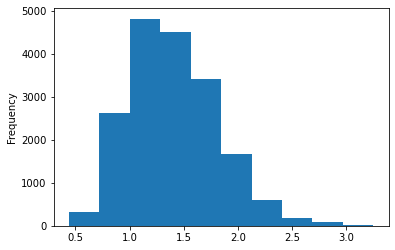

In [12]:
df['AveragePrice'].plot.hist()

The average price is between 1.2-1.5.

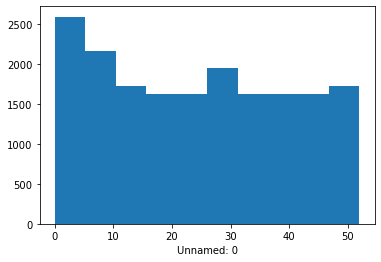

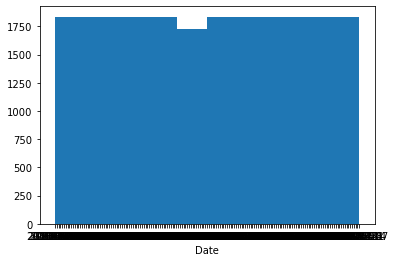

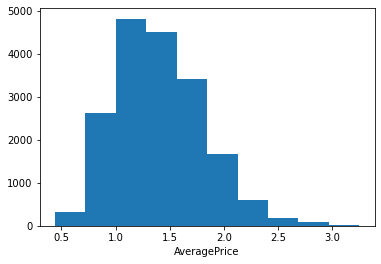

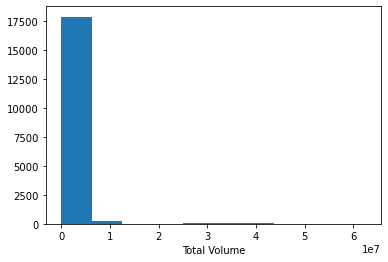

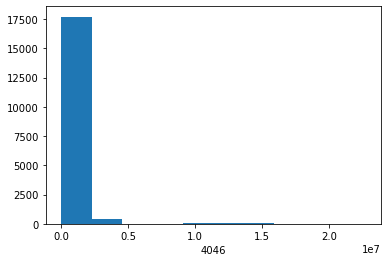

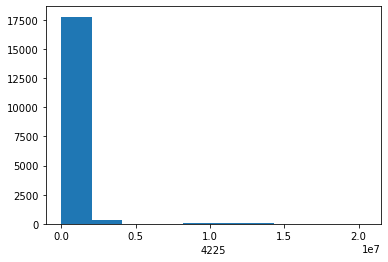

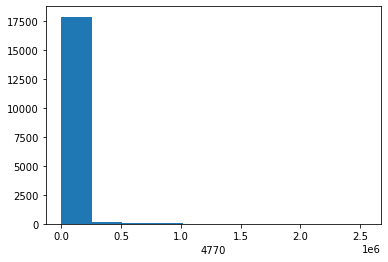

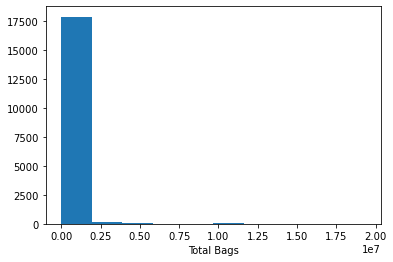

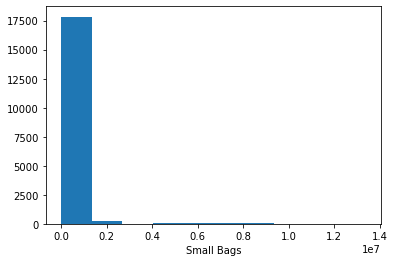

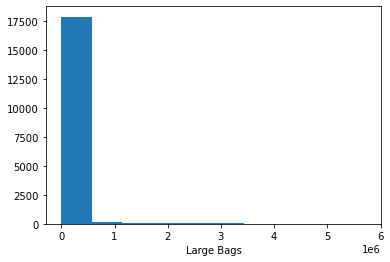

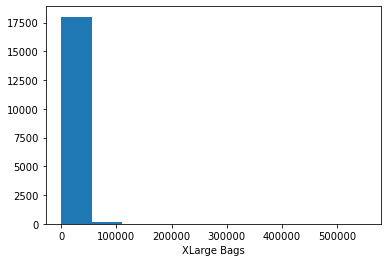

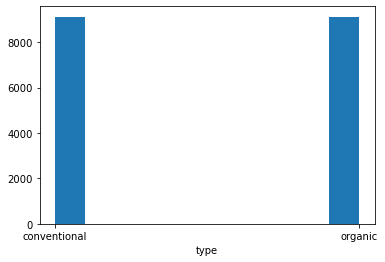

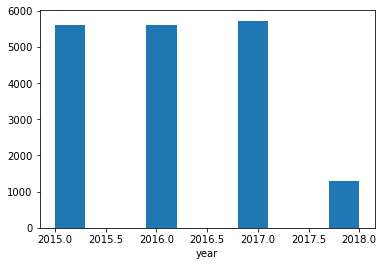

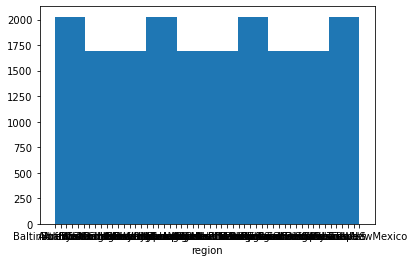

<Figure size 432x288 with 0 Axes>

In [13]:
for i in df.columns:
    plt.hist(df[i])
    plt.xlabel(i)
    plt.figure()

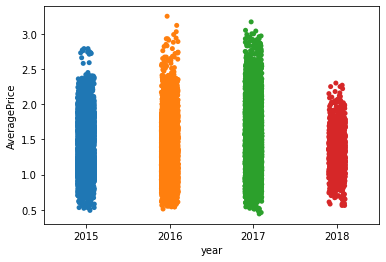

In [14]:
sns.stripplot(x='year',y='AveragePrice',data=df)

In 2016 the average price of data is more.

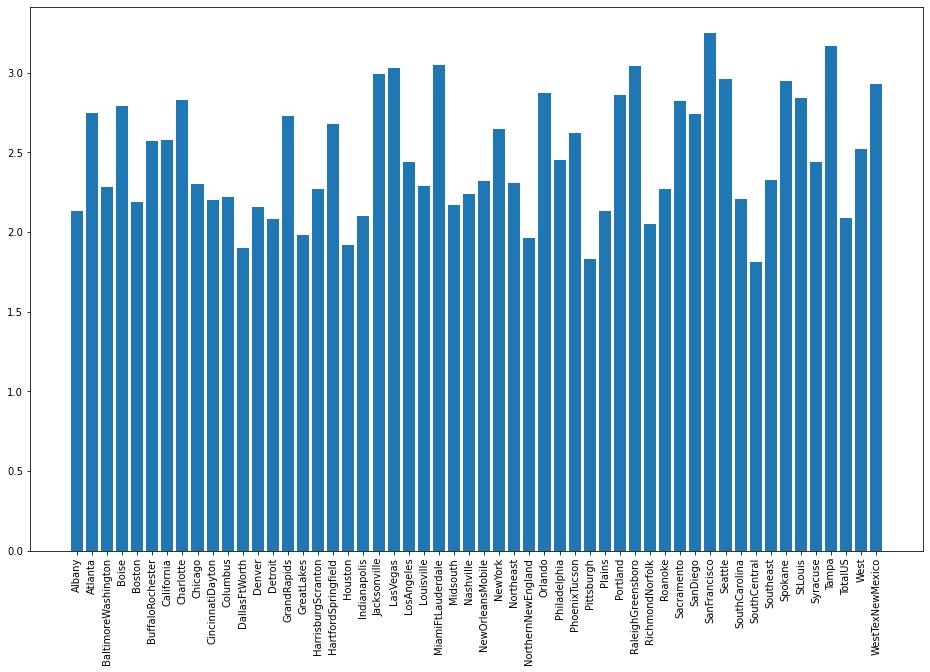

In [15]:
plt.figure(figsize=(16,10))
plt.bar(df['region'],df['AveragePrice'])
plt.xticks(rotation=90)
plt.show()

The Sanfrancisco has heighest Avearage Price.

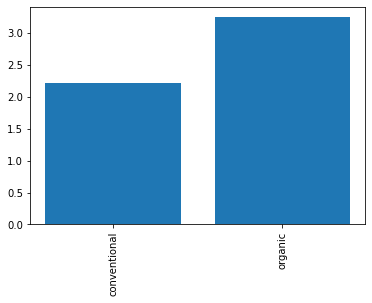

In [16]:
plt.bar(df['type'],df['AveragePrice'])
plt.xticks(rotation=90)
plt.show()

Organic Avocados has heighest average price.

In [17]:

from sklearn import preprocessing  
columns=['Date','type','year','region']  
for i in columns:
    label_encoder = preprocessing.LabelEncoder()   
    df[i]= label_encoder.fit_transform(df[i]) 
    df[i].unique() 

The Categorical data is converted into numerical data.

In [18]:
df.corr()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Unnamed: 0,1.000000,-0.419926,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.000288,-0.171667,-0.000489
Date,-0.419926,1.000000,0.145514,0.009263,-0.005028,-0.016895,-0.047517,0.064688,0.056902,0.081855,0.077374,-0.000060,0.950274,-0.000101
AveragePrice,-0.133008,0.145514,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716
Total Volume,0.014035,0.009263,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176
4046,0.017628,-0.005028,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073
4225,0.019829,-0.016895,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726
4770,0.041752,-0.047517,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252
Total Bags,-0.002219,0.064688,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256
Small Bags,0.000347,0.056902,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702
Large Bags,-0.009196,0.081855,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768


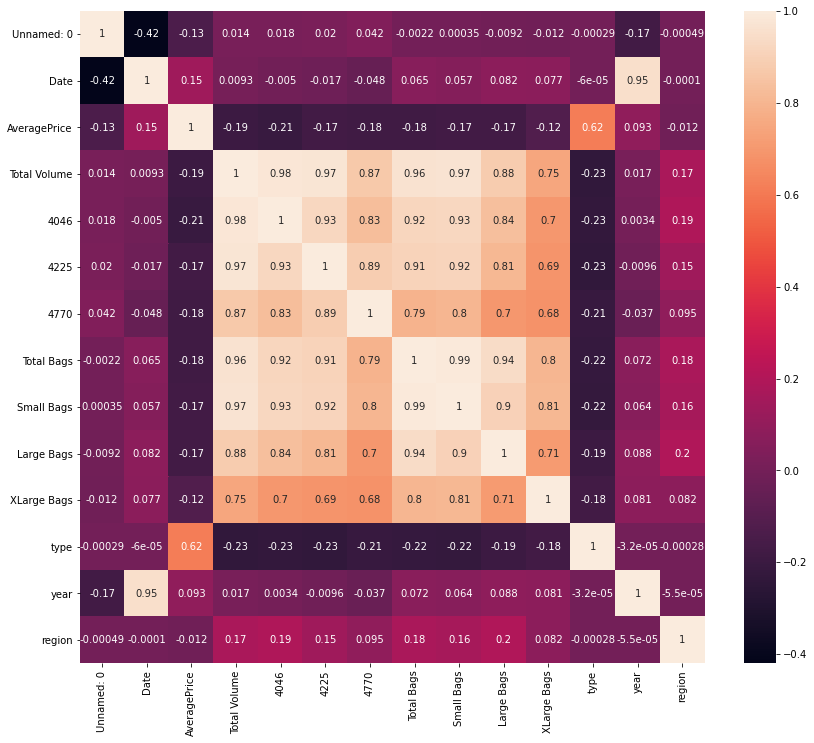

In [19]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),annot=True)

The Average price is -vely correlated with many columns and +vely correlated with column 'type'.

Unnamed: 0         AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Date            AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
AveragePrice    AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
Total Volume    AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
4046            AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
4225            AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
4770            AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
Total Bags            AxesSubplot(0.125,0.125;0.0945122x0.343182)
Small Bags         AxesSubplot(0.238415,0.125;0.0945122x0.343182)
Large Bags         AxesSubplot(0.351829,0.125;0.0945122x0.343182)
XLarge Bags        AxesSubplot(0.465244,0.125;0.0945122x0.343182)
type               AxesSubplot(0.578659,0.125;0.0945122x0.343182)
year               AxesSubplot(0.692073,0.125;0.0945122x0.343182)
region             AxesSubplot(0.805488,0.125;0.0945122x0.343182)
dtype: object

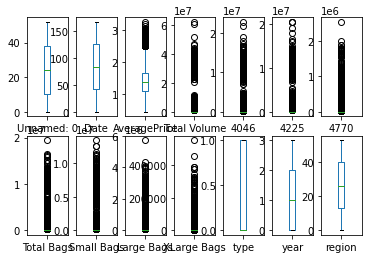

In [20]:
df.plot(kind='box',subplots=True,layout=(2,7))

The boxplot methord shows the outliers are present in the dataset.

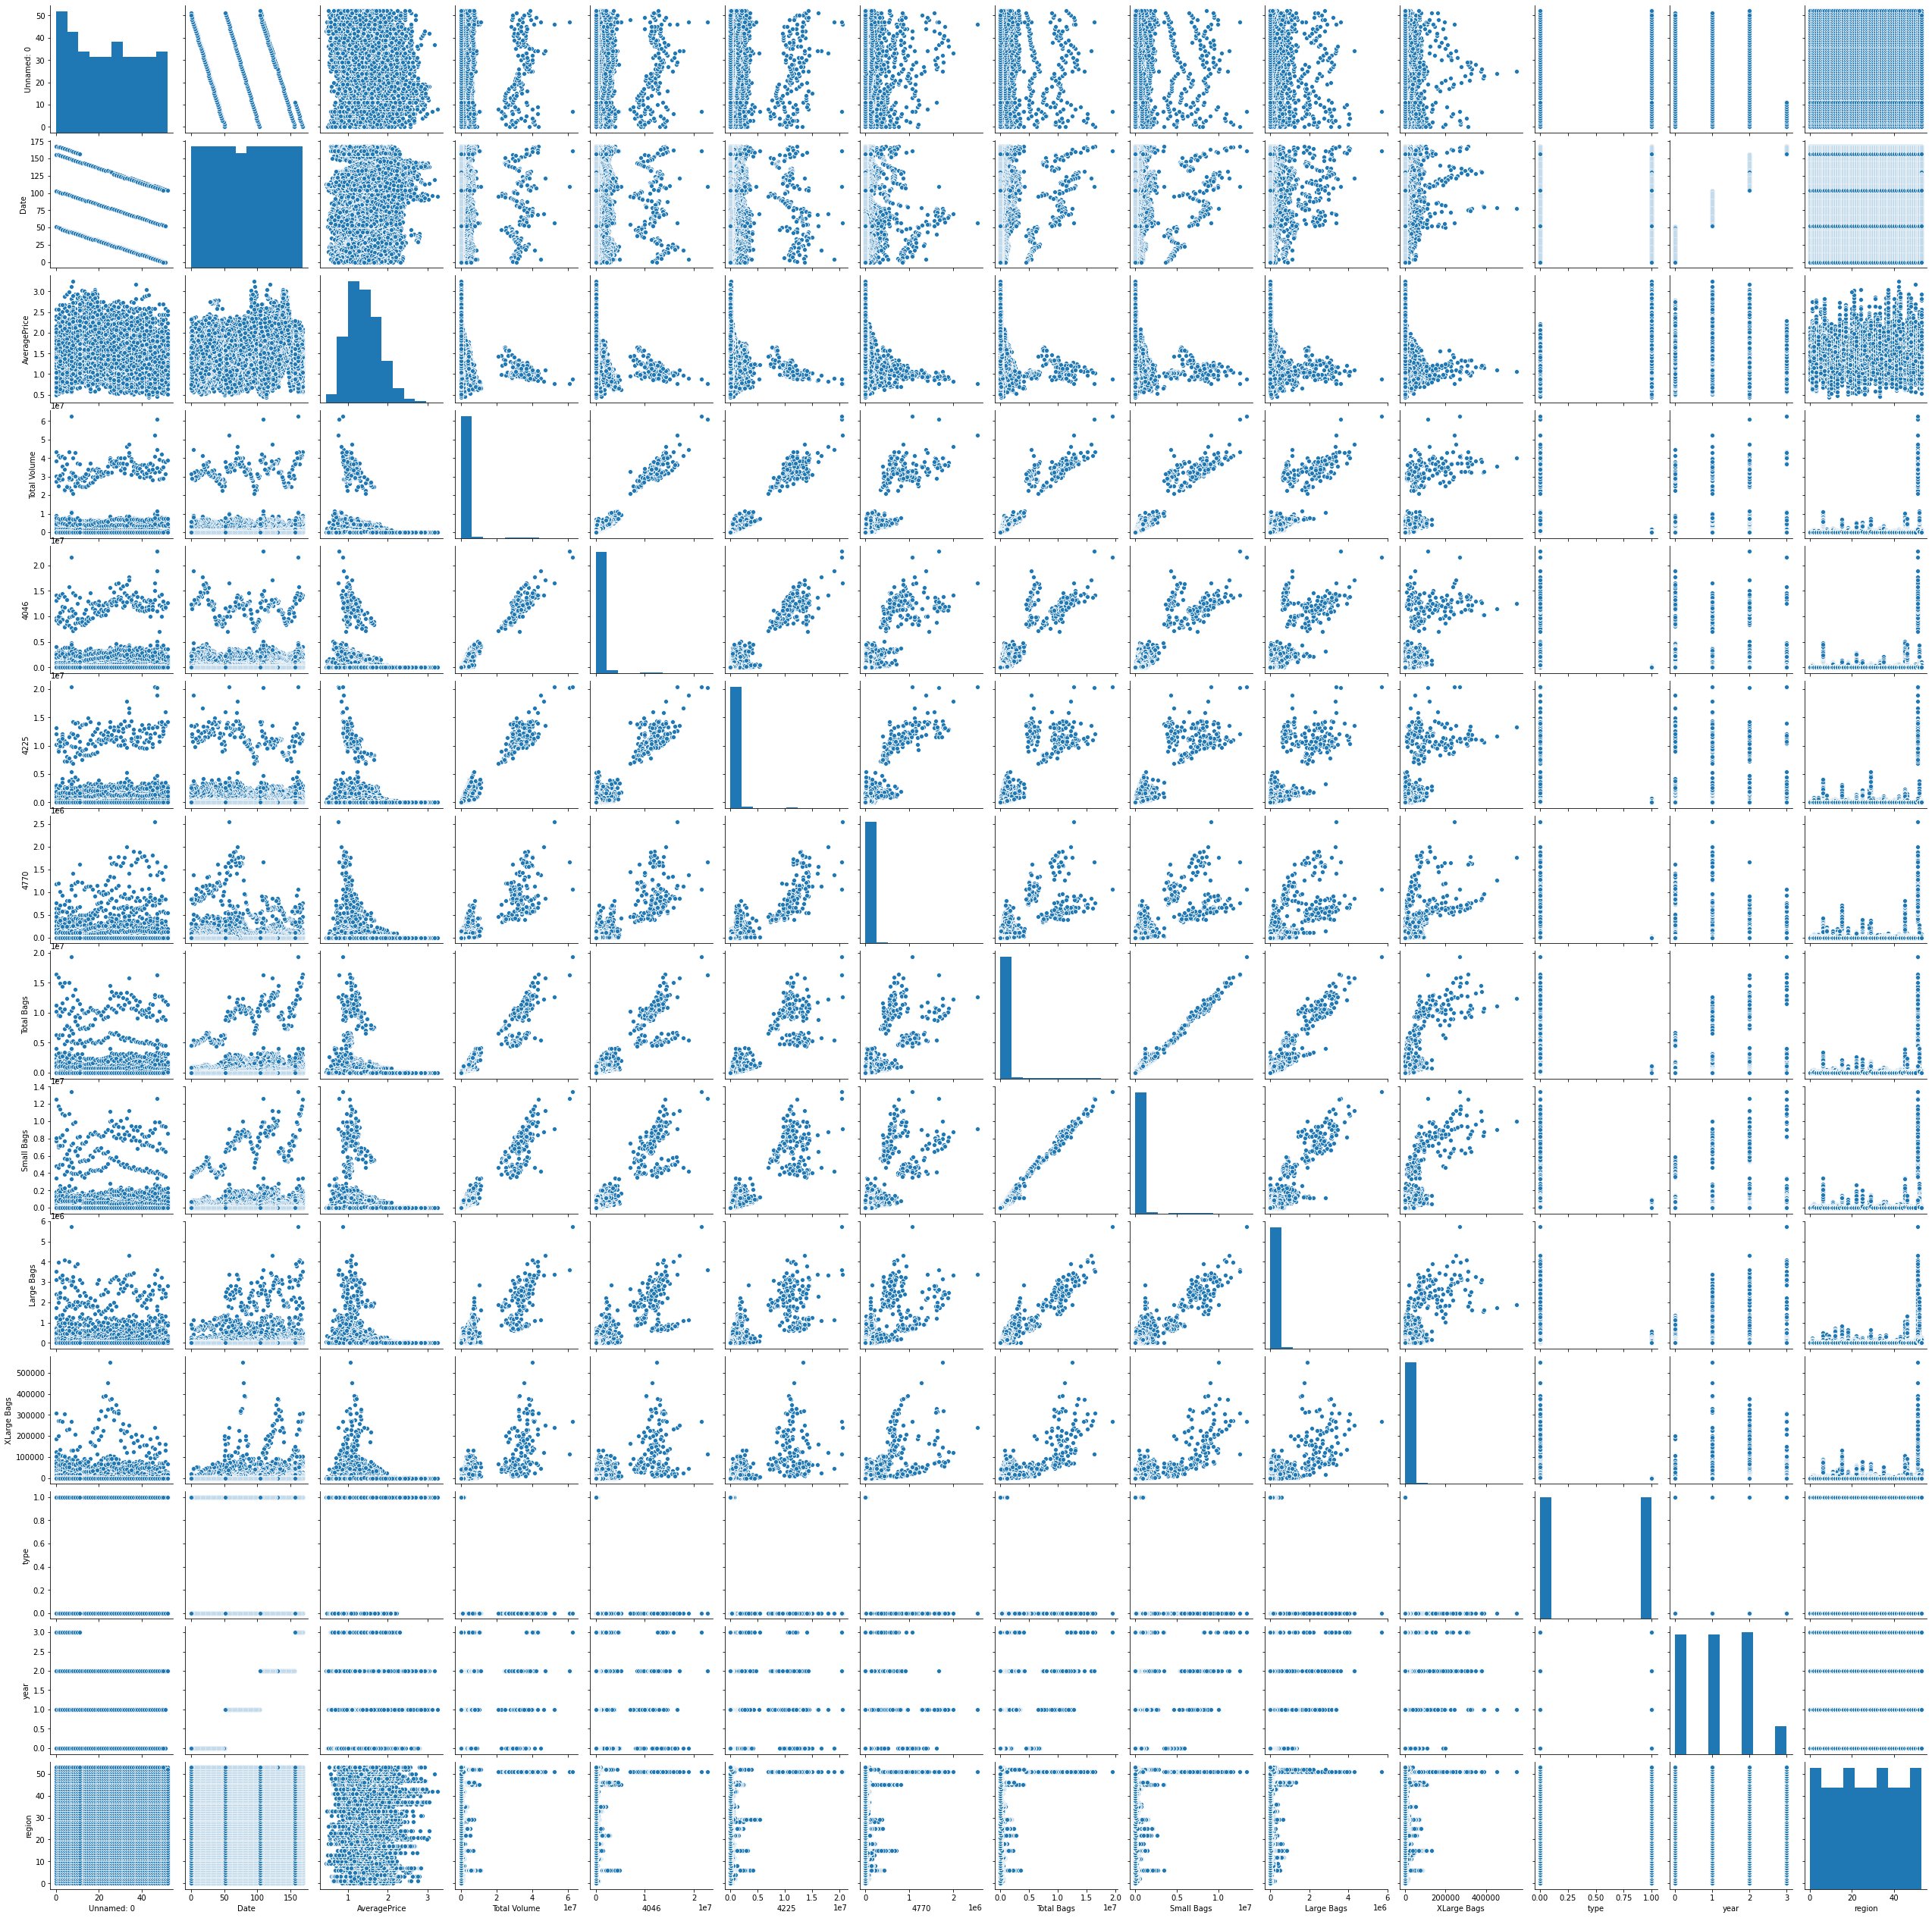

In [21]:
sns.pairplot(df)

In [62]:
# Removing Outliers

In [22]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.5653269 , 0.67635986, 0.18868864, ..., 0.99983562, 1.22128204,
        1.7002522 ],
       [1.50073001, 0.69685742, 0.13901962, ..., 0.99983562, 1.22128204,
        1.7002522 ],
       [1.43613312, 0.71735497, 1.18206895, ..., 0.99983562, 1.22128204,
        1.7002522 ],
       ...,
       [0.98395486, 1.53737632, 1.15237477, ..., 1.00016441, 1.97050371,
        1.70081131],
       [0.91935797, 1.51687877, 1.30138182, ..., 1.00016441, 1.97050371,
        1.70081131],
       [0.85476108, 1.49638121, 0.53151208, ..., 1.00016441, 1.97050371,
        1.70081131]])

In [23]:
thresold=3
print(np.where(z>3))

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64), array([ 4,  4, 10, ...,  2,  2,  2], dtype=int64))


In [24]:
dn=df[(z<3).all(axis=1)]
dn

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,51,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0,0
1,1,50,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0,0
2,2,49,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0,0
3,3,48,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0,0
4,4,47,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,161,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,3,53
18245,8,160,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,3,53
18246,9,159,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,3,53
18247,10,158,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,3,53


In [25]:
print(df.shape ,'\t',dn.shape)

(18249, 14) 	 (17651, 14)


In [26]:
df=dn

The outliers are removed from the data. The old rows are 18249 and new rows are 17651.

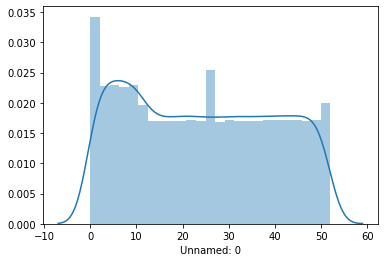

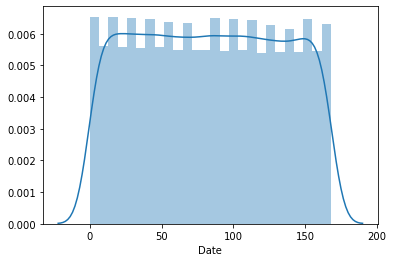

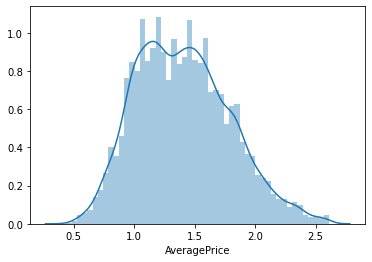

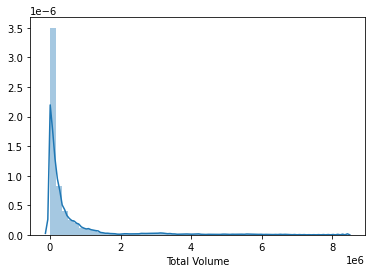

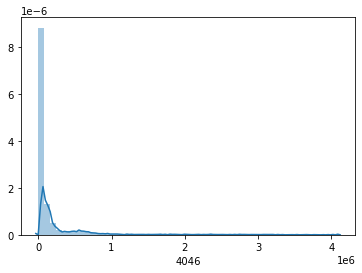

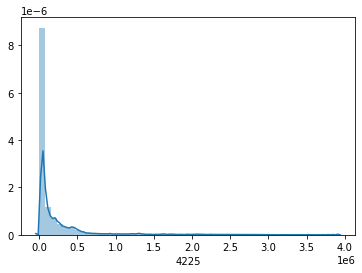

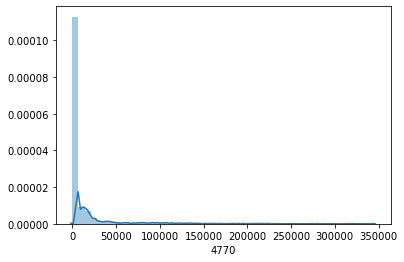

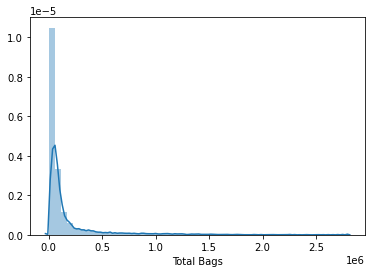

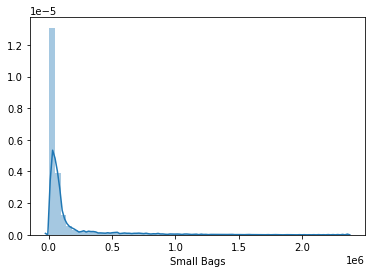

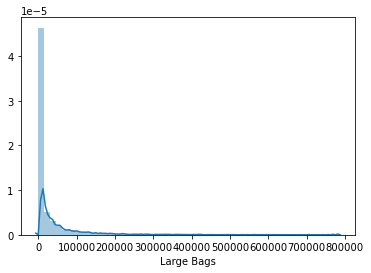

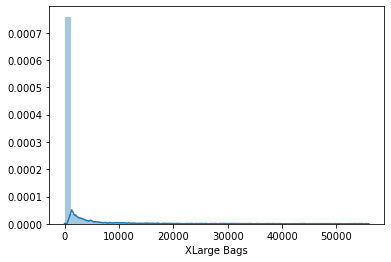

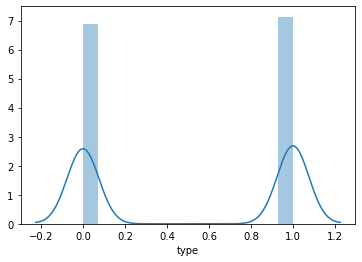

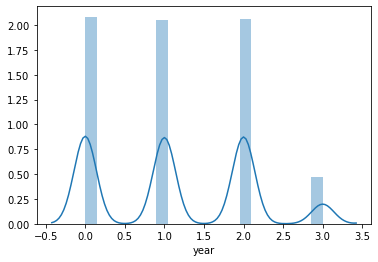

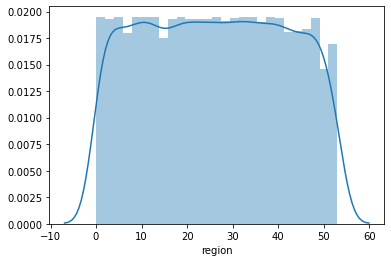

<Figure size 432x288 with 0 Axes>

In [27]:
for i in df.columns:
    sns.distplot(df[i])
    plt.xlabel(i)
    plt.figure()

In [28]:
df.skew()

Unnamed: 0      0.106116
Date            0.013714
AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
year            0.229976
region          0.012798
dtype: float64

In [29]:
from sklearn.preprocessing import power_transform
print(power_transform(df))

[[-1.96693909 -0.56745717 -0.11782446 ... -1.01904715 -1.29895853
  -2.01058988]
 [-1.79094114 -0.58972681 -0.06432986 ... -1.01904715 -1.29895853
  -2.01058988]
 [-1.64688084 -0.61212554 -1.29886469 ... -1.01904715 -1.29895853
  -2.01058988]
 ...
 [-0.92726556  1.41245946  1.18432357 ...  0.98130886  1.70123665
   1.57828237]
 [-0.84393881  1.39650072  1.31329624 ...  0.98130886  1.70123665
   1.57828237]
 [-0.76343986  1.38051236  0.61561867 ...  0.98130886  1.70123665
   1.57828237]]


* The distplot and pairplot shows the skewness is present in the dataset and df.skew() shows the mathematical representation of the skewness.
* The power Transform methord is used to remove the skewness from the data.

In [30]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,51,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0,0
1,1,50,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0,0
2,2,49,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0,0
3,3,48,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0,0
4,4,47,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0,0


In [31]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [63]:
# Model Training

In [64]:
xn=df.drop(['AveragePrice'],axis=1)

In [65]:
y=df['AveragePrice']
y=pd.DataFrame(data=y)

In [66]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(xn)
x=pd.DataFrame(x,columns=xn.columns)

In [67]:
# Standard Scaler is used to scaling the data or normalising.

In [35]:
max_r_score=0;
for r in range (0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=r)
    ln=LinearRegression()
    ln.fit(x_train,y_train) 
    pred=ln.predict(x_test)
    r2=r2_score(y_test,pred)
    if r2> max_r_score:
        max_r_score=r2;
        final_r_state=r;
print('max accuracy score for random state:',final_r_state,"is:",max_r_score)

max accuracy score for random state: 6 is: 0.47013416031850674


In [68]:
# the Logistic Regression model is giving beat result at randaom state at 6.

In [36]:
print(x_train.shape ,'\t',y_train.shape)

(13767, 13) 	 (13767, 1)


In [37]:
print(x_test.shape ,'\t',y_test.shape)

(3884, 13) 	 (3884, 1)


In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=6)

In [39]:
ln=LinearRegression()
ln.fit(x_train,y_train) 
pred=ln.predict(x_test)

In [40]:
ln.score(x_train,y_train)

0.4387031623156631

In [41]:
print('errors:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

errors:
Mean absolute error: 0.22010454243794378
Mean squared error: 0.07914954609406116
Root mean squared error: 0.28133529123460704


In [42]:
print(r2_score(y_test,pred))

0.47013416031850674


The Linear Regression model is giving the r2 score of 0.4701.

In [43]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet   

In [44]:
model=[DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet()];

In [45]:
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print(m,'\n')
    print('errors:')
    print('Mean absolute error:',mean_absolute_error(y_test,predm),'\n')
    print('Mean squared error:',mean_squared_error(y_test,predm),'\n')
    print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,predm)),'\n')
    print('r2_score:',r2_score(y_test,predm),'\n')
    print('**********************************************************************************************************************')
    print('\n')

DecisionTreeRegressor() 

errors:
Mean absolute error: 0.11518795056642636 

Mean squared error: 0.03201125128733264 

Root mean squared error: 0.17891688374027936 

r2_score: 0.7857010004522252 

**********************************************************************************************************************


KNeighborsRegressor() 

errors:
Mean absolute error: 0.1306354273944387 

Mean squared error: 0.03565399794026776 

Root mean squared error: 0.18882266267656475 

r2_score: 0.761314669648627 

**********************************************************************************************************************


SVR() 

errors:
Mean absolute error: 0.16607945106393082 

Mean squared error: 0.05186777592219413 

Root mean squared error: 0.22774498001535431 

r2_score: 0.6527716961413244 

**********************************************************************************************************************


Lasso() 

errors:
Mean absolute error: 0.3162908670841339 

Mean squ

The DecisionTreeRrgressor model is giving the best r2 score i.e 0.7857.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [47]:
parameters={'criterion':['mse']}
dtr=DecisionTreeRegressor()
clf=GridSearchCV(dtr,parameters)
clf.fit(x_train,y_train)
sorted(clf.cv_results_.keys())
print(clf.best_params_)

{'criterion': 'mse'}


In [48]:
dtr=DecisionTreeRegressor('mse')
dtr.fit(x_train,y_train) 
preddtr=dtr.predict(x_test)

In [49]:
print('errors:')
print('Mean absolute error:',mean_absolute_error(y_test,preddtr))
print('Mean squared error:',mean_squared_error(y_test,preddtr))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,preddtr)))

errors:
Mean absolute error: 0.11504634397528322
Mean squared error: 0.03261503604531411
Root mean squared error: 0.18059633452901006


In [50]:
print(r2_score(y_test,preddtr))

0.7816589694670502


The DecisionTreeRrgressor has only one parameter 'mse' for Hyperparameteric tunning.

In [51]:
from sklearn.ensemble import RandomForestRegressor    

In [52]:
rf=RandomForestRegressor(n_estimators=100,random_state=6)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
rf.score(x_train,y_train)

0.9862935897787004

In [53]:
print('errors:')
print('Mean absolute error:',mean_absolute_error(y_test,predrf))
print('Mean squared error:',mean_squared_error(y_test,predrf))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,predrf)))

errors:
Mean absolute error: 0.08281889804325436
Mean squared error: 0.014685316122554061
Root mean squared error: 0.12118298611007265


In [54]:
print(r2_score(y_test,predrf))

0.9016892990261997


The RandomForestRrgressor model is giving the best r2 score i.e 0.9016.

In [55]:
from sklearn.ensemble import AdaBoostRegressor

In [56]:
ada=AdaBoostRegressor(base_estimator=dtr,n_estimators=20,random_state=40)
ada.fit(x_train,y_train)
predada=ada.predict(x_test)
ada.score(x_train,y_train)

0.9995858301292633

In [57]:
print('errors:')
print('Mean absolute error:',mean_absolute_error(y_test,predada))
print('Mean squared error:',mean_squared_error(y_test,predada))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,predada)))

errors:
Mean absolute error: 0.07664778578784757
Mean squared error: 0.013748197734294542
Root mean squared error: 0.11725270885695793


In [58]:
print(r2_score(y_test,predada))

0.9079628286442469


The DecisionTreeRrgressor as base_estimator is giving the best r2 score i.e 0.9079 with AdaBoostRegressor.

In [59]:
adascore=cross_val_score(ada,x,y,cv=5)
print(adascore)

[0.33270052 0.57863649 0.61822834 0.43384987 0.02427145]


In [60]:
print(adascore.mean(),adascore.std())

0.39753733409770947 0.21276806990444208


The cross validation is used to remove the underfitting and overfitting of the data.

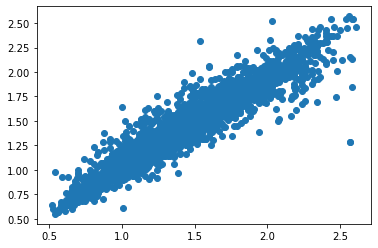

In [61]:
plt.scatter(y_test,predada)

The scatter plot shows the relation between y_test and predicted data

In [70]:
import joblib

In [71]:
joblib.dump(ada,'titanic_dataset.pkl')

['titanic_dataset.pkl']